In [35]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df= pd.read_csv('/content/drive/MyDrive/Dataset/Salary.csv')

In [37]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


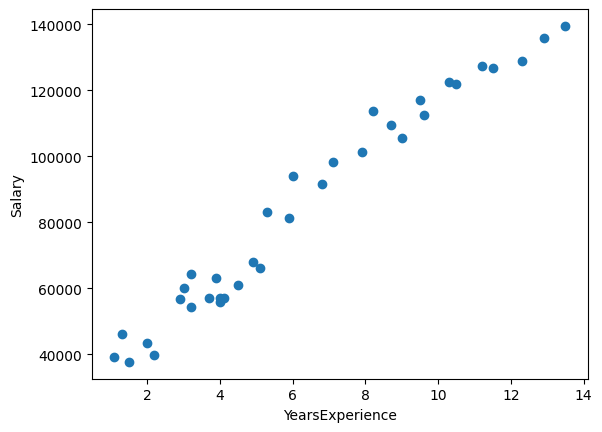

In [38]:
plt.scatter(df.	YearsExperience,df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [39]:
x = KMeans(n_clusters=3)

In [40]:
y_predicted = x.fit_predict(df[['YearsExperience','Salary']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
df['cluster']=y_predicted
df.head()

,YearsExperience,Salary,cluster
0,1.1,39343,1
1,1.3,46205,1
2,1.5,37731,1
3,2.0,43525,1
4,2.2,39891,1


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


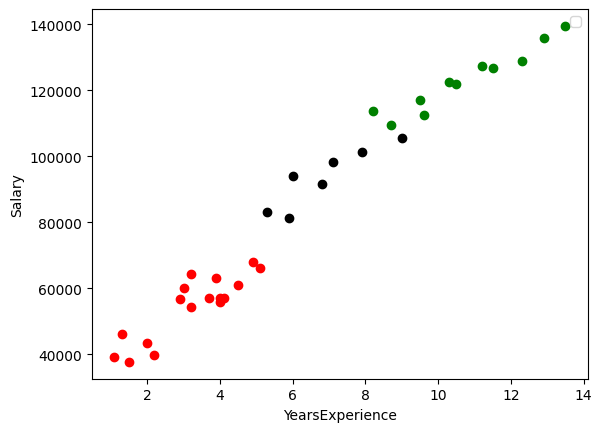

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.YearsExperience,df1['Salary'],color='green')
plt.scatter(df2.YearsExperience,df2['Salary'],color='red')
plt.scatter(df3.YearsExperience,df3['Salary'],color='black')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

In [45]:
scaler = MinMaxScaler()

scaler.fit(df[['Salary']])
df['Salary']=scaler.transform(df[['Salary']])

scaler.fit(df[['YearsExperience']])
df['YearsExperience']=scaler.transform(df[['YearsExperience']])

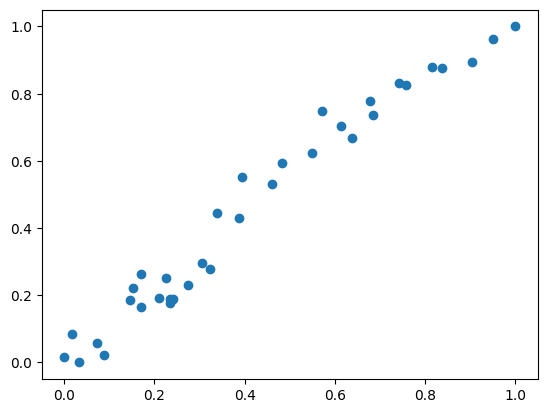

In [47]:
plt.scatter(df.YearsExperience,df['Salary'])

In [48]:
x.cluster_centers_

array([[1.07454545e+01, 1.23192364e+05],
       [3.21176471e+00, 5.45702353e+04],
       [6.85714286e+00, 9.36122857e+04]])

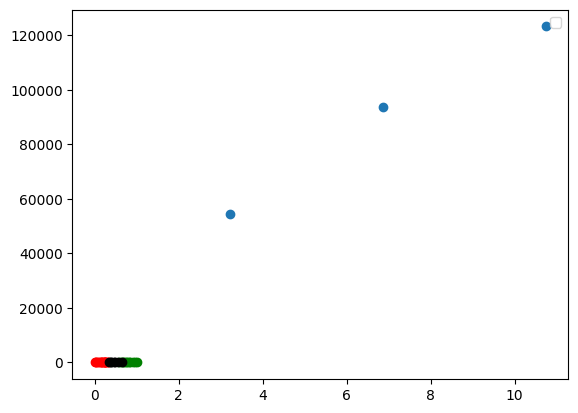

In [51]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.YearsExperience,df1['Salary'],color='green')
plt.scatter(df2.YearsExperience,df2['Salary'],color='red')
plt.scatter(df3.YearsExperience,df3['Salary'],color='black')
plt.scatter(x.cluster_centers_[:,0],x.cluster_centers_[:,1])
plt.legend()


In [52]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['YearsExperience','Salary']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

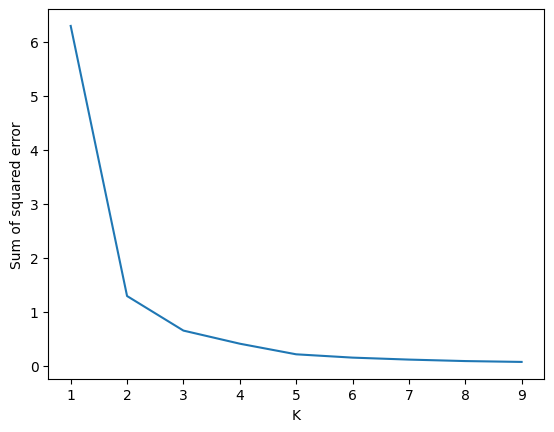

In [53]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)